In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import feature_importance as fi
import data_processing as dp
import scipy as sp
import data_processing as dp
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time
from util import timeSince

In [6]:
paclitaxel_gini_ctrp = fi.forest_important_feats('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv')
paclitaxel_gini_ctrp = paclitaxel_gini_ctrp.sort_values('importance',ascending=False)
paclitaxel_gini_ctrp.to_csv('PACLITAXEL_CTRP_data_p.binarized.gini.csv',index=False)
pvals_ctrp = pd.read_csv('Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DE_pval.csv',header='infer', index_col=None)
#pvals_ctrp[:10]

made dataset in  0m 1s
fit done in  0m 5s


(-0.5204809982204417, 4.659218906524405e-36)

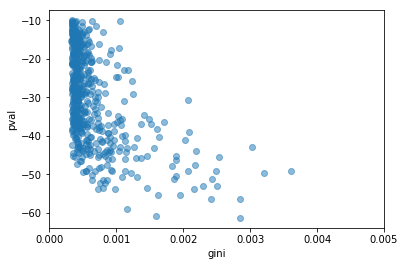

In [13]:
from scipy.stats.stats import pearsonr
genes = set(paclitaxel_gini_ctrp['gene'][:500])
x = [list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [np.log(list(pvals_ctrp.loc[pvals_ctrp['gene'] == gene]['pval'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('gini')
plt.ylabel('pval')
plt.title('')
plt.xlim([0,0.005])
pearsonr(x,y)

In [8]:
path = 'Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
data = pd.read_csv(path,sep='\t',header='infer', index_col=None)
feats = list(data.columns)[1:]
ranked_feat_i=[feats.index(feat) for feat in paclitaxel_gini_ctrp['gene']]
p_accs_DE = fi.forest_feature_saturation_intervaled(path, ranked_feat_i, trials=100, steps=800, pair=None, interval=80)

made dataset in  0m 1s
[[ 7.5130e-02  7.1630e-01 -6.8240e-02 ...  2.5550e+00  3.3000e+00
   5.4380e+00]
 [-2.4340e-03  1.9150e+00 -2.7010e-02 ...  2.3480e+00  3.2050e+00
   6.2340e+00]
 [-2.4340e-03  3.2730e+00  6.5970e-01 ...  9.2700e-01  1.9630e+00
   6.7850e+00]
 ...
 [-2.4340e-03  3.2230e+00  1.2410e-01 ...  1.2640e+00  3.0860e+00
   5.0430e+00]
 [ 1.3084e-02  1.8720e+00 -1.3270e-02 ...  1.1980e+00  3.0740e+00
   6.4200e+00]
 [-2.4340e-03  1.9570e+00  6.9150e-02 ...  1.7160e+00  2.5350e+00
   6.5800e+00]]
0
spent  0m 9s
1
spent  0m 16s
2
spent  0m 24s
3
spent  0m 31s
4
spent  0m 39s
5
spent  0m 46s
6
spent  0m 54s
7
spent  1m 2s
8
spent  1m 9s
9
spent  1m 17s
10
spent  1m 24s
11
spent  1m 32s
12
spent  1m 40s
13
spent  1m 47s
14
spent  1m 55s
15
spent  2m 2s
16
spent  2m 10s
17
spent  2m 18s
18
spent  2m 25s
19
spent  2m 33s
20
spent  2m 40s
21
spent  2m 48s
22
spent  2m 56s
23
spent  3m 3s
24
spent  3m 11s
25
spent  3m 19s
26
spent  3m 26s
27
spent  3m 34s
28
spent  3m 41s
29
spen

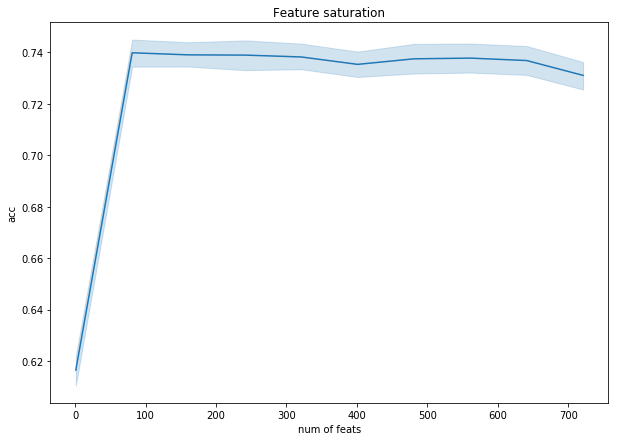

In [9]:
p_accs= p_accs_DE[0]
mean_p_accs = [sp.mean(f) for f in p_accs]
std_p_accs = [np.std(f) for f in p_accs]
p_accs_df = pd.DataFrame([[fs+1,p_accs[fs][t]] for t in range(len(p_accs[1])) for fs in range(len(p_accs))],columns=['num of feats','acc'])
p_accs_df = p_accs_df[p_accs_df.acc != 0.]
plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="num of feats", y="acc", data=p_accs_df).set_title('Feature saturation')

In [15]:
docetaxel_gini_ctrp = fi.forest_important_feats('Data/DOCETAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv')
docetaxel_gini_ctrp = docetaxel_gini_ctrp.sort_values('importance',ascending=False)
docetaxel_gini_ctrp.to_csv('DOCETAXEL_CTRP_data_p.binarized.gini.csv',index=False)
pvals_ctrp = pd.read_csv('DOCETAXEL_CTRP_data_p.binarizedAUC1.DE_pval.csv',header='infer', index_col=None)

made dataset in  0m 0s
fit done in  0m 2s


(-0.47524573610749754, 1.5471302191101947e-29)

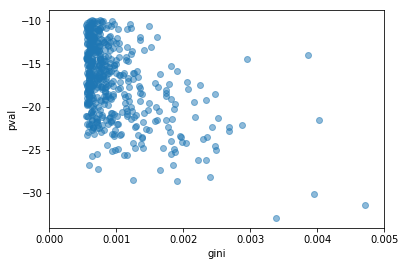

In [16]:
from scipy.stats.stats import pearsonr
genes = set(docetaxel_gini_ctrp['gene'][:500])
x = [list(docetaxel_gini_ctrp.loc[docetaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [np.log(list(pvals_ctrp.loc[pvals_ctrp['gene'] == gene]['pval'])[0]) for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('gini')
plt.ylabel('pval')
plt.title('')
plt.xlim([0,0.005])
pearsonr(x,y)

In [17]:
path = 'Data/DOCETAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
data = pd.read_csv(path,sep='\t',header='infer', index_col=None)
feats = list(data.columns)[1:]
ranked_feat_i=[feats.index(feat) for feat in docetaxel_gini_ctrp['gene']]
p_accs_DE = fi.forest_feature_saturation_intervaled(path, ranked_feat_i, trials=100, steps=800, pair=None, interval=80)

made dataset in  0m 0s
[[1.939  1.657  1.97   ... 4.914  2.893  1.28  ]
 [1.539  1.622  0.3398 ... 5.523  4.     0.91  ]
 [2.049  2.02   4.184  ... 4.293  0.8467 1.567 ]
 ...
 [1.362  1.021  1.12   ... 5.523  3.975  1.461 ]
 [1.838  3.121  3.312  ... 4.89   3.592  1.839 ]
 [0.886  2.02   4.95   ... 4.562  3.3    1.198 ]]
0
spent  0m 6s
1
spent  0m 12s
2
spent  0m 19s
3
spent  0m 25s
4
spent  0m 31s
5
spent  0m 37s
6
spent  0m 44s
7
spent  0m 50s
8
spent  0m 56s
9
spent  1m 2s
10
spent  1m 9s
11
spent  1m 15s
12
spent  1m 21s
13
spent  1m 27s
14
spent  1m 34s
15
spent  1m 40s
16
spent  1m 46s
17
spent  1m 53s
18
spent  1m 59s
19
spent  2m 5s
20
spent  2m 11s
21
spent  2m 18s
22
spent  2m 24s
23
spent  2m 30s
24
spent  2m 36s
25
spent  2m 43s
26
spent  2m 49s
27
spent  2m 55s
28
spent  3m 2s
29
spent  3m 8s
30
spent  3m 14s
31
spent  3m 20s
32
spent  3m 27s
33
spent  3m 33s
34
spent  3m 39s
35
spent  3m 46s
36
spent  3m 52s
37
spent  3m 58s
38
spent  4m 5s
39
spent  4m 11s
40
spent  4m 1

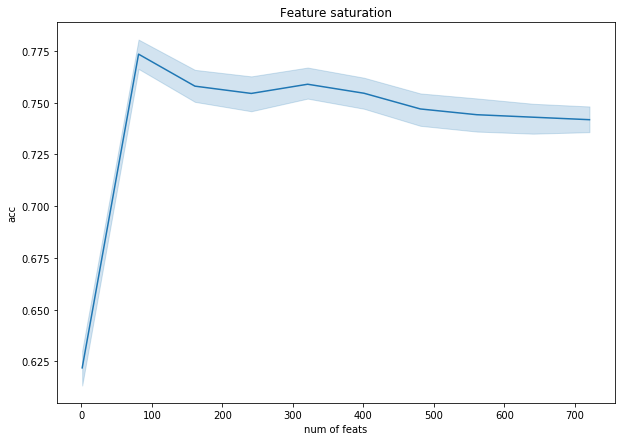

In [18]:
p_accs= p_accs_DE[0]
mean_p_accs = [sp.mean(f) for f in p_accs]
std_p_accs = [np.std(f) for f in p_accs]
p_accs_df = pd.DataFrame([[fs+1,p_accs[fs][t]] for t in range(len(p_accs[1])) for fs in range(len(p_accs))],columns=['num of feats','acc'])
p_accs_df = p_accs_df[p_accs_df.acc != 0.]
plt.subplots(figsize=(10,7))
ax = sns.lineplot(x="num of feats", y="acc", data=p_accs_df).set_title('Feature saturation')

(0.3952994590593608, 1.391049731537996e-08)

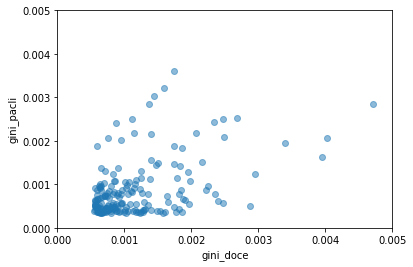

In [20]:
from scipy.stats.stats import pearsonr
genes = set(docetaxel_gini_ctrp['gene'][:500]).intersection(set(paclitaxel_gini_ctrp['gene'][:500]))
x = [list(docetaxel_gini_ctrp.loc[docetaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
y = [list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('gini_doce')
plt.ylabel('gini_pacli')
plt.title('')
plt.xlim([0,0.005])
plt.ylim([0,0.005])
pearsonr(x,y)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
path = 'Data/PACLITAXEL_CTRP_data_p.binarizedAUC1.DEG5e-05.tsv'
clf = LinearDiscriminantAnalysis()
X, y, feats = dp.get_data(path)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf.fit(X_train, y_train)
coefs = clf.coef_[0]
gene_coefs = [[feats[i],coefs[i]] for i in range(len(feats))]
gene_coefs = pd.DataFrame(gene_coefs,columns=['gene','lda_coeff'])

/home/annambiar/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [34]:
clf.score(X_test, y_test)

0.6756756756756757

(-0.045023450957159046, 0.31501977385661817)

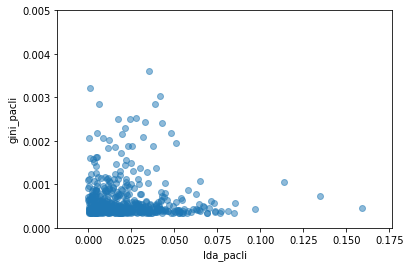

In [32]:
from scipy.stats.stats import pearsonr
genes = set(paclitaxel_gini_ctrp['gene'][:500])
x = [abs(list(gene_coefs.loc[gene_coefs['gene'] == gene]['lda_coeff'])[0]) for gene in genes]
y = [list(paclitaxel_gini_ctrp.loc[paclitaxel_gini_ctrp['gene'] == gene]['importance'])[0] for gene in genes]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('lda_pacli')
plt.ylabel('gini_pacli')
plt.title('')
#plt.xlim([0,0.005])
plt.ylim([0,0.005])
pearsonr(x,y)